<a href="https://colab.research.google.com/github/ryeos/Data-Mining-CaseStudy-AlumniData/blob/main/Data_Mining_Case_Study_Alumni_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Kasus Ujian UTS Data Mining Ganjil 2023:
- Kalian akan diminta melakukan Proses Data Mining untuk menentukan 3 dan hanya 3 Insight/Informasi yang menurut anda paling penting dari data Tracer Alumni.
- Data yang kalian olah adalah data asli dari alumni dengan menghilangkan informasi personal seperti nama, email, nomer mahasiswa, dsb.

##Modul dan Packages

In [ ]:
# Import Modules
import warnings; warnings.simplefilter('ignore')
import pandas as pd, seaborn as sns, matplotlib.pyplot as plt, numpy as np
import missingno as msno

from sklearn import preprocessing
from sklearn.model_selection import train_test_split

import statsmodels.formula.api as smf
from statsmodels.formula.api import ols
import statsmodels.api as sm, scipy.stats as stats
from statsmodels.stats.outliers_influence import variance_inflation_factor

##Input Data

In [ ]:
# Import Data Set from GitHub
file_ = '/content/CaseStudy-AlumniData.xlsx'
try: # Running Locally
    df = pd.read_excel(file_)
except: # Running in Google Colab
    !mkdir data
    !wget -P data/ https://docs.google.com/spreadsheets/d/1bQd0wMKsIrKDbEPUM67P67NKjKG4GtDWdTsK8CVUXIk/edit#gid=2134995845
    df = pd.read_excel(file_)

In [ ]:
# Show The First Ten Data
df.head(10)

,Alumni-ID,Timestamp,Tahun Masuk,Tahun Wisuda,Status saat ini:,Waktu Mendapatkan Pekerjaan:,Tahun masuk saat anda melanjutkan studi setelah lulus dari Prodi Matematika:,Posisi anda saat ini di tempat bekerja saat Ini:,Nama Universitas dan Kota tempat melanjutkan Studi setelah S1,Nama jurusan/program studi setelah S1,Tahun saudara mulai berwirausaha:,Bidang wirausaha:,Kesesuaian Kurikulum:,Kesesuaian Bidang Ilmu:,Perkiraan rata-rata penghasilan (take-home-pay) anda per-bulan saat ini (dalam juta rupiah):
0,1,2023-07-25 09:55:00,2004.0,2010.0,ASN/PNS,Kurang dari 3 bulan.,2014,Guru Kelas,Universitas Terbuka,Pendidikan Guru Sekolah Dasar,NaN,NaN,3.0,3.0,4.0
1,2,2023-07-26 10:10:00,2015.0,2020.0,ASN/PNS,6-12 bulan,NaN,NaN,NaN,NaN,NaN,NaN,3.0,3.0,6.0
2,3,2023-07-28 02:00:00,2000.0,2006.0,ASN/PNS,Kurang dari 3 bulan.,S2 2008 dan S3 2020,Dosen,S2 UI dan S3 IPB,Magister Teknologi Informasi dan Doktoral Ilmu...,NaN,NaN,5.0,5.0,5.0
3,4,2023-07-27 14:27:00,2014.0,2019.0,karyawan BUMN,6-12 bulan,NaN,Officer HC Solution Analysis Support,NaN,NaN,NaN,NaN,3.0,3.0,8.0
4,5,2023-07-25 09:44:00,2013.0,2018.0,Karyawan Swasta,Kurang dari 3 bulan.,2021,Control Tower,ITS - Surabaya,Supply Chain,NaN,NaN,4.0,3.0,15.0
5,6,2023-07-25 09:46:00,2019.0,2023.0,Karyawan Swasta,Kurang dari 3 bulan.,NaN,Account Payable Accountant,NaN,NaN,NaN,NaN,4.0,1.0,6.0
6,7,2023-07-25 09:46:00,2009.0,2013.0,Karyawan Swasta,Kurang dari 3 bulan.,NaN,Category Management,NaN,NaN,NaN,NaN,3.0,2.0,NaN
7,8,2023-07-25 09:54:00,2018.0,2022.0,Karyawan Swasta,Kurang dari 3 bulan.,NaN,Data analyst,NaN,NaN,NaN,NaN,3.0,5.0,5.0
8,9,2023-07-25 09:55:00,2016.0,2022.0,Karyawan Swasta,Kurang dari 3 bulan.,NaN,Business Analyst,NaN,NaN,NaN,NaN,5.0,5.0,7.0
9,10,2023-07-25 09:59:00,2017.0,2021.0,Karyawan Swasta,Kurang dari 3 bulan.,NaN,Junior Consultant,NaN,NaN,NaN,NaN,3.0,2.0,6.0


##Informasi Variabel

In [ ]:
# Data Information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210 entries, 0 to 209
Data columns (total 15 columns):
 #   Column                                                                                        Non-Null Count  Dtype         
---  ------                                                                                        --------------  -----         
 0   Alumni-ID                                                                                     210 non-null    int64         
 1   Timestamp                                                                                     110 non-null    datetime64[ns]
 2   Tahun Masuk                                                                                   110 non-null    float64       
 3   Tahun Wisuda                                                                                  110 non-null    float64       
 4   Status saat ini:                                                                              110 non-null    

In [ ]:
print(df.isnull().sum())

Alumni-ID                                                                                         0
Timestamp                                                                                       100
Tahun Masuk                                                                                     100
Tahun Wisuda                                                                                    100
Status saat ini:                                                                                100
Waktu Mendapatkan Pekerjaan:                                                                    100
Tahun masuk saat anda melanjutkan studi setelah lulus dari Prodi Matematika:                    186
Posisi anda saat ini di tempat bekerja saat Ini:                                                126
Nama Universitas dan Kota tempat melanjutkan Studi setelah S1                                   186
Nama jurusan/program studi setelah S1                                                           186


In [ ]:
df.describe(include = 'all')

,Alumni-ID,Timestamp,Tahun Masuk,Tahun Wisuda,Status saat ini:,Waktu Mendapatkan Pekerjaan:,Tahun masuk saat anda melanjutkan studi setelah lulus dari Prodi Matematika:,Posisi anda saat ini di tempat bekerja saat Ini:,Nama Universitas dan Kota tempat melanjutkan Studi setelah S1,Nama jurusan/program studi setelah S1,Tahun saudara mulai berwirausaha:,Bidang wirausaha:,Kesesuaian Kurikulum:,Kesesuaian Bidang Ilmu:,Perkiraan rata-rata penghasilan (take-home-pay) anda per-bulan saat ini (dalam juta rupiah):
count,210.000000,110,110.000000,110.000000,110,110,24,84,24,24,13,12,110.000000,110.000000,66.000000
unique,NaN,102,NaN,NaN,11,7,14,73,17,15,6,7,NaN,NaN,NaN
top,NaN,2023-07-27 20:48:00,NaN,NaN,Karyawan Swasta,Kurang dari 3 bulan.,-,Dosen,-,-,-,-,NaN,NaN,NaN
freq,NaN,3,NaN,NaN,70,60,6,4,6,6,6,6,NaN,NaN,NaN
first,NaN,2023-07-25 09:44:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,2023-10-06 14:40:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,105.500000,NaN,2014.081818,2018.927273,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.872727,3.563636,7.646212
std,60.765944,NaN,4.854076,4.948745,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.879002,1.045105,8.999497
min,1.000000,NaN,2000.000000,2006.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,1.000000,1.000000
25%,53.250000,NaN,2011.250000,2016.250000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.000000,3.000000,4.125000


In [ ]:
#Drop baris 110-212 karena tidak ada isi
a = 110
df = df.drop(df.index[a:], axis=0)
df.tail(10)

,Alumni-ID,Timestamp,Tahun Masuk,Tahun Wisuda,Status saat ini:,Waktu Mendapatkan Pekerjaan:,Tahun masuk saat anda melanjutkan studi setelah lulus dari Prodi Matematika:,Posisi anda saat ini di tempat bekerja saat Ini:,Nama Universitas dan Kota tempat melanjutkan Studi setelah S1,Nama jurusan/program studi setelah S1,Tahun saudara mulai berwirausaha:,Bidang wirausaha:,Kesesuaian Kurikulum:,Kesesuaian Bidang Ilmu:,Perkiraan rata-rata penghasilan (take-home-pay) anda per-bulan saat ini (dalam juta rupiah):
100,101,2023-08-02 13:22:00,2015.0,2022.0,Karyawan Swasta,Kurang dari 3 bulan.,NaN,Staff Administrasi,NaN,NaN,NaN,NaN,4.0,4.0,4.0
101,102,2023-08-02 13:23:00,2016.0,2021.0,"Melanjutkan Studi, Wirausaha",Wirausaha,2023,NaN,Universitas budi luhur,Manajemen,2018,Memiliki bimbel private,5.0,5.0,6.0
102,103,2023-08-02 13:27:00,2019.0,2023.0,karyawan BUMN,Kurang dari 3 bulan.,NaN,Officer Development Program (ODP),NaN,NaN,NaN,NaN,3.0,3.0,NaN
103,104,2023-08-02 13:29:00,2017.0,2022.0,Guru,Kurang dari 3 bulan.,NaN,Guru Mata Pelajaran,NaN,NaN,NaN,NaN,4.0,4.0,NaN
104,105,2023-08-02 13:54:00,2015.0,2020.0,Karyawan Swasta,6-12 bulan,NaN,Finance Staff,NaN,NaN,NaN,NaN,4.0,2.0,4.0
105,106,2023-08-02 14:39:00,2017.0,2023.0,Karyawan Swasta,Kurang dari 3 bulan.,NaN,Administrasi HR Database,NaN,NaN,NaN,NaN,4.0,4.0,NaN
106,107,2023-08-02 16:50:00,2011.0,2016.0,Karyawan Swasta,Kurang dari 3 bulan.,2018,AI & Data Analytics,Universitas Indonesia,Matematika,NaN,NaN,4.0,4.0,NaN
107,108,2023-08-03 16:37:00,2016.0,2021.0,Karyawan Swasta,6-12 bulan,NaN,Assistant,NaN,NaN,NaN,NaN,3.0,3.0,4.5
108,109,2023-08-03 16:44:00,2003.0,2007.0,Karyawan Swasta,3-6 Bulan,NaN,Branch Operation & Service Manager,NaN,NaN,NaN,NaN,2.0,2.0,NaN
109,110,2023-10-06 14:40:00,2018.0,2023.0,Karyawan Swasta,3-6 Bulan,NaN,Data Analyst,NaN,NaN,NaN,NaN,3.0,4.0,5.0


##Preprocessing Data

In [ ]:
# Copy Data
df1 = df.copy()

In [ ]:
# Type Data Correction
df1['Waktu Mendapatkan Pekerjaan:'] = df1['Waktu Mendapatkan Pekerjaan:'].astype('category')
# Unique values pada Variabel 'Waktu mendapatkan pekerjaan'
df1['Waktu Mendapatkan Pekerjaan:'].dtypes

df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110 entries, 0 to 109
Data columns (total 15 columns):
 #   Column                                                                                        Non-Null Count  Dtype         
---  ------                                                                                        --------------  -----         
 0   Alumni-ID                                                                                     110 non-null    int64         
 1   Timestamp                                                                                     110 non-null    datetime64[ns]
 2   Tahun Masuk                                                                                   110 non-null    float64       
 3   Tahun Wisuda                                                                                  110 non-null    float64       
 4   Status saat ini:                                                                              110 non-null    

In [ ]:
# Duplicate Check
print(df1.duplicated().sum())

0


##INSIGHT 1

Perbandingan waktu mendapatkan pekerjaan dari tahun angkatan wisudawan

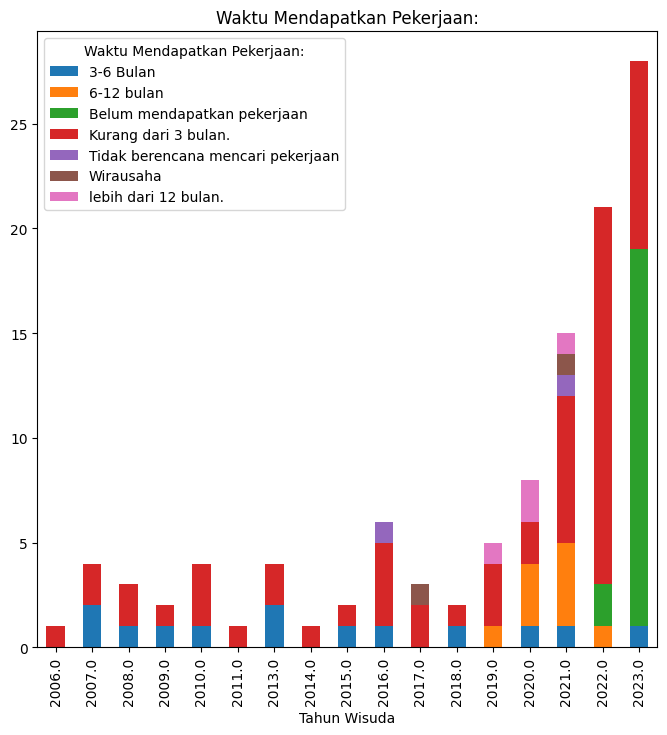

In [ ]:
Waktu = pd.crosstab(index=df1['Tahun Wisuda'], columns=df1['Waktu Mendapatkan Pekerjaan:'])
plot = Waktu.plot(kind="bar", figsize=(8,8), stacked=True, title='Waktu Mendapatkan Pekerjaan:', xlabel='Tahun Wisuda')

Berdasarkan waktu mendapatkan pekerjaan, dapat dilihat bahwa terdapat kecendurungan bahwa hampir setiap angkatan mendapatkan pekerjaan dalam kurun waktu kurang dari 3 bulan. Selain itu dapat kita lihat bahwa terdapat kurang lebih 15 orang lulusan tahun 2023 yang masih belum mendapatkan pekerjaan. Hal ini sangat wajar karena mereka baru saja lulus dan mungkin sedang mencari pekerjaan.

##INSIGHT 2

In [ ]:
df2 = df1['Tahun masuk saat anda melanjutkan studi setelah lulus dari Prodi Matematika:'].fillna(0)
df2 = df2.where(df2 == 0,1)
df22 = df1['Tahun saudara mulai berwirausaha:'].fillna(0)
df22 = df22.where(df22 == 0,1)

data1 = {'Lanjut studi':df2, 'Wirausaha':df22, 'posisi': df1['Posisi anda saat ini di tempat bekerja saat Ini:'], 'Gaji': df1['Perkiraan rata-rata penghasilan (take-home-pay) anda per-bulan saat ini (dalam juta rupiah):']}
data1 = pd.DataFrame(data1)
data1 = data1.dropna(subset=['Gaji']) #Menghapus data yang tidak mengandung gaji karena dikhawatirkan mengganggu perhitungan
data1

,Lanjut studi,Wirausaha,posisi,Gaji
0,1,0,Guru Kelas,4.0
1,0,0,NaN,6.0
2,1,0,Dosen,5.0
3,0,0,Officer HC Solution Analysis Support,8.0
4,1,0,Control Tower,15.0
...,...,...,...,...
100,0,0,Staff Administrasi,4.0
101,1,1,NaN,6.0
104,0,0,Finance Staff,4.0
107,0,0,Assistant,4.5


Text(0, 0.5, 'Rata-rata gaji(dalam Juta)')

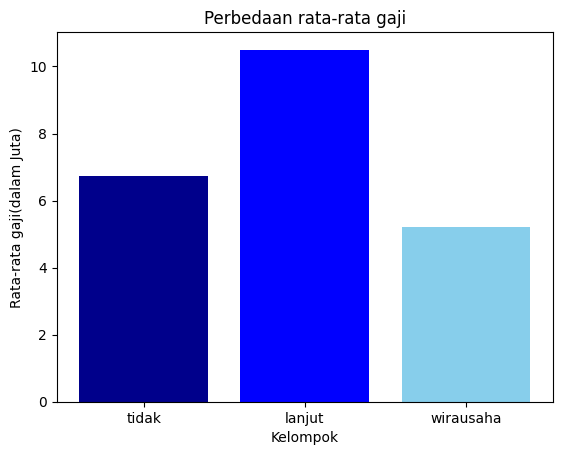

In [ ]:
tidak = data1[data1['Lanjut studi']==0]
lanjut = data1[data1['Lanjut studi']==1]
wirausaha = data1[data1['Wirausaha']==1]

#rata-rata gaji tiap kelompok
avg_tidak = tidak['Gaji'].mean()
avg_lanjut = lanjut['Gaji'].mean()
avg_wirausaha = wirausaha['Gaji'].mean()

#visualisasi
cat = ['tidak','lanjut','wirausaha']
avg = avg_tidak,avg_lanjut,avg_wirausaha
plt.bar(cat, avg, color = ['darkblue','blue','skyblue'])
plt.title('Perbedaan rata-rata gaji')
plt.xlabel('Kelompok')
plt.ylabel('Rata-rata gaji(dalam Juta)')

In [ ]:
data1 = data1[data1['Lanjut studi'] == 1]
data1

,Lanjut studi,Wirausaha,posisi,Gaji
0,1,0,Guru Kelas,4.0
2,1,0,Dosen,5.0
4,1,0,Control Tower,15.0
10,1,1,Sekretaris Yayasan & Administrasi Kependidikan,5.0
14,1,0,Head of AI and Data Analytics,65.0
17,1,1,Penulis,5.0
20,1,0,PENGAJAR TETAP BIDANG STUDI MATEMATIKA,8.5
21,1,0,Data Scientist,18.0
46,1,0,Dosen,4.0
59,1,0,Guru,2.0


In [ ]:
import plotly.express as px
position_counts = data1['posisi'].value_counts().reset_index()
position_counts.columns = ['posisi', 'Jumlah']
# Membuat pie chart dengan Plotly
fig = px.pie(position_counts, values='Jumlah', names='posisi', title='Posisi Pekerjaan Lulusan S2 dan S3', color_discrete_sequence=px.colors.sequential.RdBu)
fig.update_layout(
    title_text='Pie Chart Posisi Pekerjaan',
    title_x=0.5,
    title_y=0.95
    )
fig.show()

Berdasarkan rata-rata gaji, dapat dilihat bahwa wisudawan yang melanjutkan studi cenderung mendapatkan gaji yang lebih tinggi ketimbang wisudawan yang tidak melanjutkan studi maupun berwirausaha. Jika dilihat lebih rinci lagi, posisi pekerjaan wisudawan yang melanjutkan studi paling banyak bergerak di bidang akademis, dimana sekitar 42,82% wisudawan yang melanjutkan studi bergerak di bidang akademis. Kemudian jika dilihat dari gaji terbanyak, wisudawan dengan posisi Head of AI and Data Analytics mempunyai gaji terbesar dengan gaji sebesar 65 juta rupiah.

##INSIGHT 3

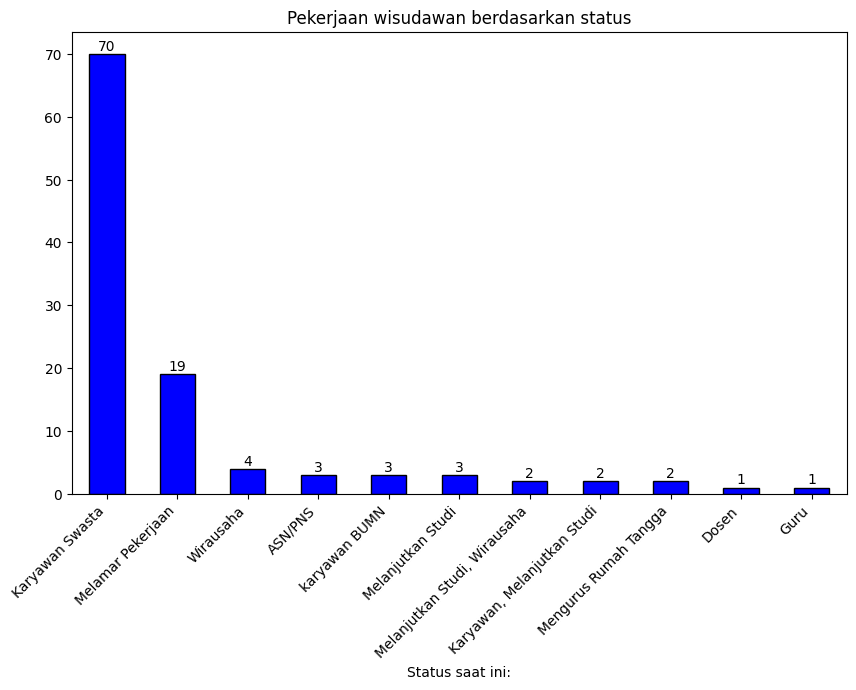

In [ ]:
df3 = df1['Status saat ini:'].fillna(0)
df3 = df3.value_counts()

#Plotting
df3.plot(kind='bar', figsize=(10, 6), color='blue', edgecolor='black')
plt.title('Pekerjaan wisudawan berdasarkan status')
plt.xlabel('Status saat ini:')
plt.xticks(rotation=45, ha='right')

#labels
for index, value in enumerate(df3):
    plt.text(index, value + 0.1, str(value), ha='center', va='bottom')

plt.show()

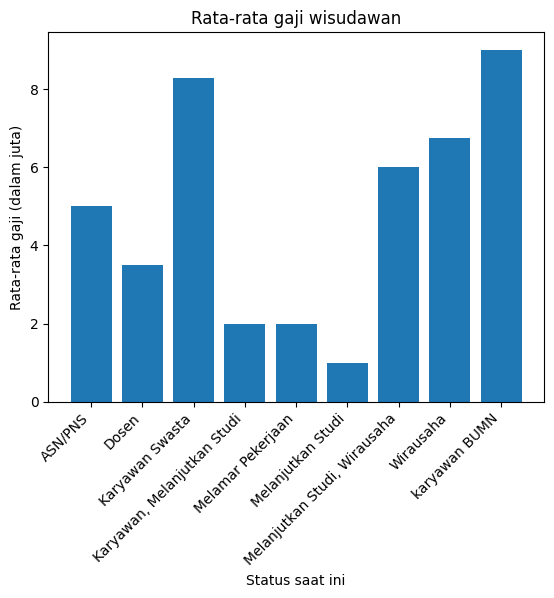

In [ ]:
df3_avg = df1.groupby('Status saat ini:')['Perkiraan rata-rata penghasilan (take-home-pay) anda per-bulan saat ini (dalam juta rupiah):'].mean().reset_index()
df3_avg = df3_avg.dropna(subset=['Perkiraan rata-rata penghasilan (take-home-pay) anda per-bulan saat ini (dalam juta rupiah):']) #menghapus rata-tata gaji yang 0 karena mengganggu perhitungan
#Plotting
plt.bar(df3_avg['Status saat ini:'], df3_avg['Perkiraan rata-rata penghasilan (take-home-pay) anda per-bulan saat ini (dalam juta rupiah):'])
plt.title('Rata-rata gaji wisudawan')
plt.xlabel('Status saat ini')
plt.ylabel('Rata-rata gaji (dalam juta)')
plt.xticks(rotation=45, ha='right')
plt.show()

Berdasarkan status saat ini, dapat dilihat bahwa sebanyak 70 wisudawan memiliki status sebagai karyawan swasta, yang merupakan status terbanyak yang dimiliki oleh wisudawan. Dapat dilihat bahwa rata-rata gaji karyawan swasta sebesar 8 juta rupiah, lebih tinggi dari UMR Jakarta yang sekitar 5 juta rupiah. Namun rata-rata gaji karyawan swasta masih lebih rendah dibanding karyawan BUMN dengan rata-rata gaji sebesar 9 juta rupiah.